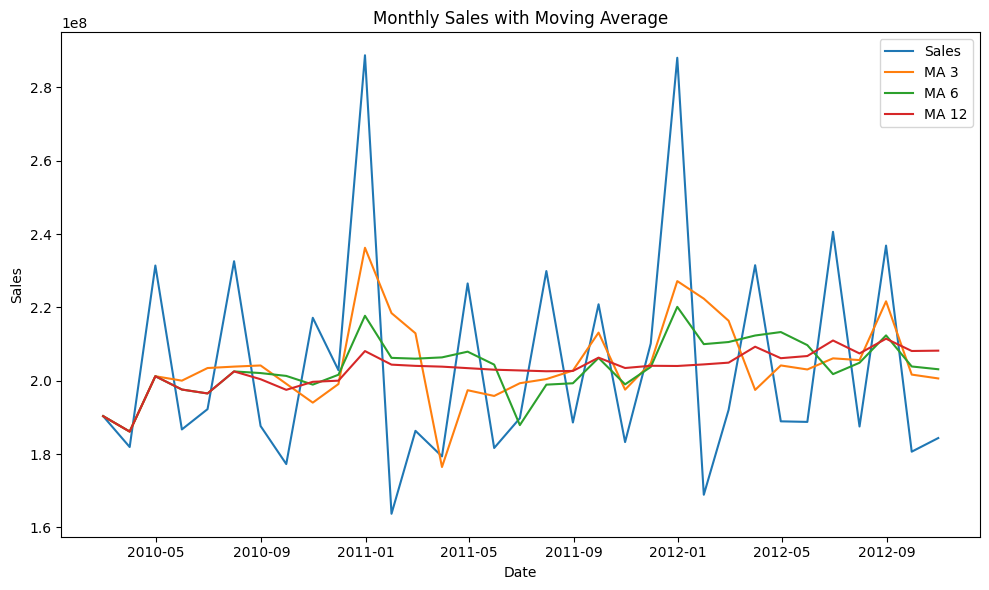

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("Walmart.csv")

date="Date"
store="Store"
product="Dept"
sales="Weekly_Sales"

df[date]=pd.to_datetime(df[date])

monthly_data = (
    df.groupby([store, product]).resample("ME", on=date)[sales].sum().reset_index()
)

Monthly_total=monthly_data.groupby("Date",as_index=False)[sales].sum()

#Moving Average
Monthly_total["MA_3"]=Monthly_total[sales].rolling(3,min_periods=1).mean()
Monthly_total["MA_6"]=Monthly_total[sales].rolling(6,min_periods=1).mean()
Monthly_total["MA_12"]=Monthly_total[sales].rolling(12,min_periods=1).mean()

Monthly_total = Monthly_total.sort_values("Date")


#plot
plt.figure(figsize=(10, 6))
plt.plot(Monthly_total["Date"],Monthly_total[sales],label="Sales")
plt.plot(Monthly_total["Date"],Monthly_total["MA_3"],label="MA 3")
plt.plot(Monthly_total["Date"],Monthly_total["MA_6"],label="MA 6")
plt.plot(Monthly_total["Date"],Monthly_total["MA_12"],label="MA 12")
plt.title("Monthly Sales with Moving Average")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()

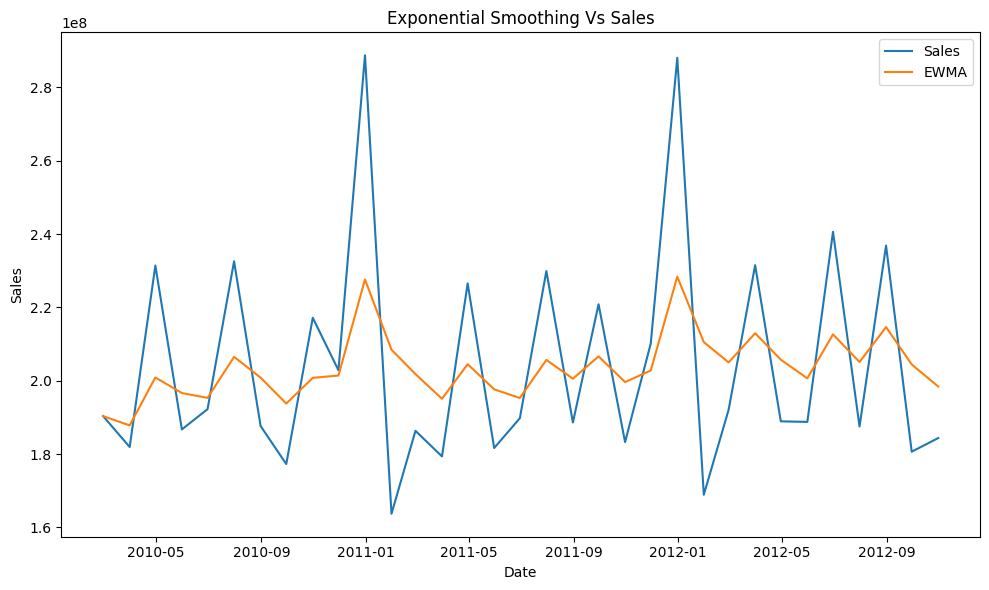

In [2]:
# Exponential  Smoothing
Monthly_total["EWMA"]=Monthly_total[sales].ewm(alpha=0.3,adjust=False).mean()
plt.figure(figsize=(10,6))
plt.plot(Monthly_total["Date"],Monthly_total[sales],label="Sales")
plt.plot(Monthly_total["Date"],Monthly_total["EWMA"],label="EWMA")
plt.title("Exponential Smoothing Vs Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()

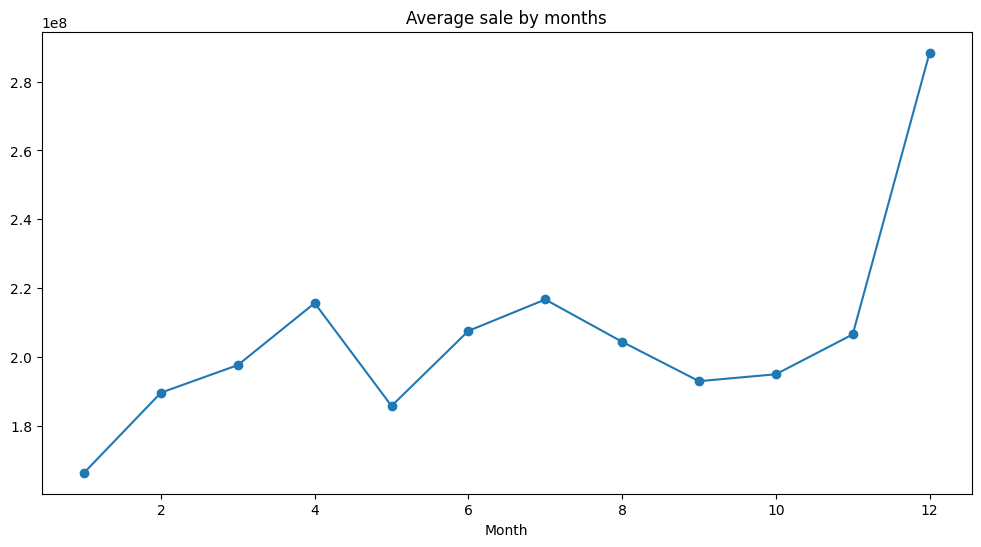

In [3]:
#Seasonality
Monthly_total["Month"]=Monthly_total["Date"].dt.month
seasonality=Monthly_total.groupby("Month",as_index=False)[sales].mean()
plt.figure(figsize=(12, 6))
plt.plot(seasonality["Month"],seasonality[sales],marker='o')
plt.title("Average sale by months")
plt.xlabel("Month")
plt.show()

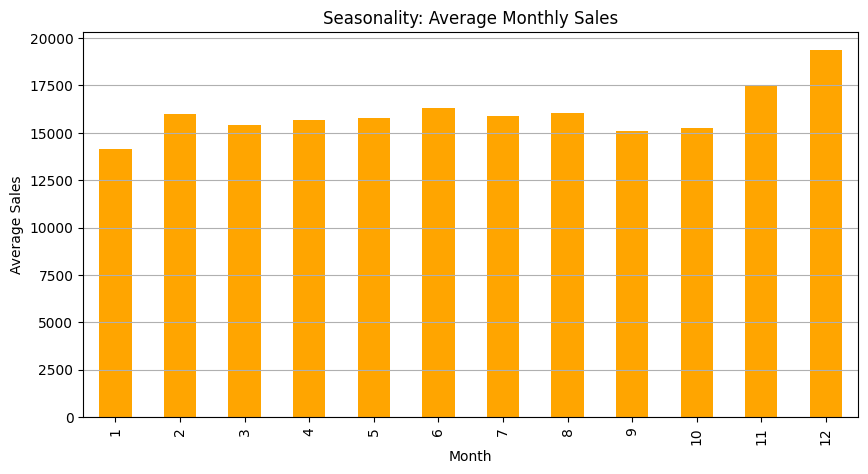

In [4]:
df['Month'] = df['Date'].dt.month
seasonality = df.groupby('Month')['Weekly_Sales'].mean()
plt.figure(figsize=(10,5))
seasonality.plot(kind='bar', color='orange')
plt.title("Seasonality: Average Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.grid(axis='y')
plt.show()

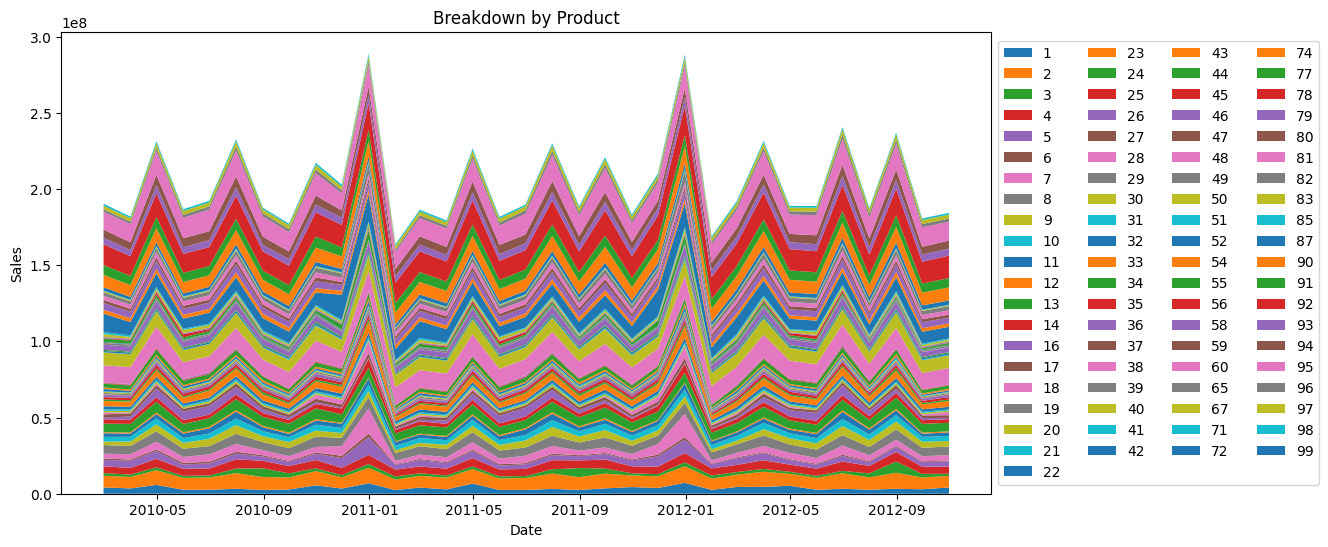

In [5]:
#Breakdown PRoduct and Region
by_product=monthly_data.groupby(["Date",product],as_index=False)[sales].sum()
by_region=monthly_data.groupby(["Date",store],as_index=False)[sales].sum()

#plot
pivot=by_product.pivot(index="Date",columns=product,values=sales).fillna(0)
plt.figure(figsize=(12, 6))
plt.stackplot(pivot.index,pivot.T.values,labels=pivot.columns)
plt.title("Breakdown by Product")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=4)
plt.show()


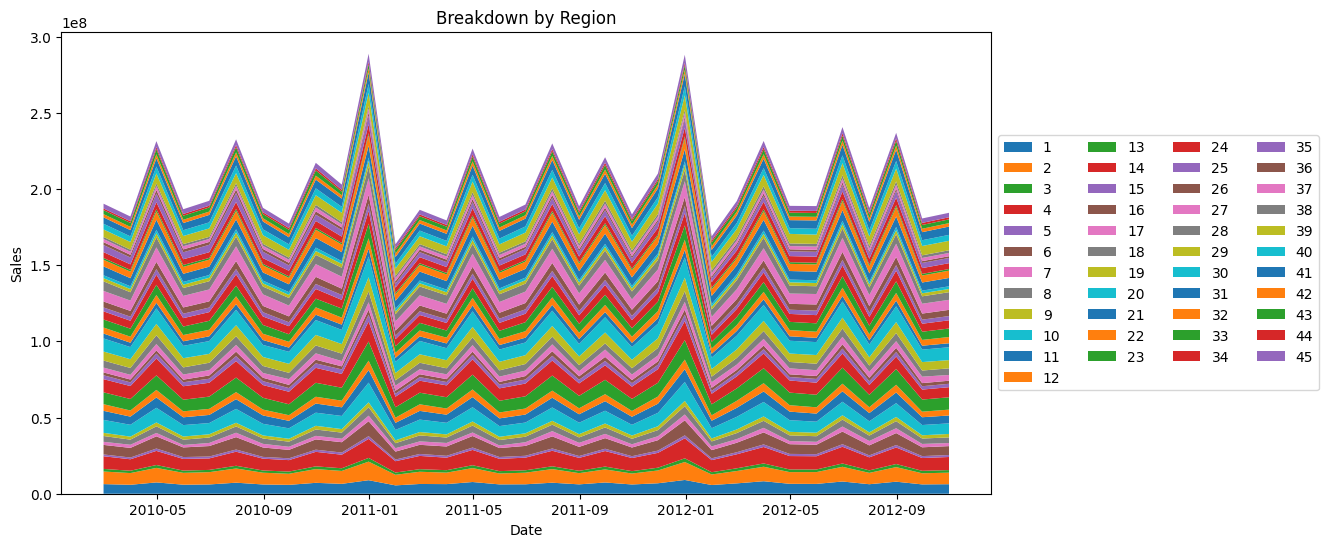

In [6]:
#breakdown by region
pivot=by_region.pivot(index="Date",columns=store,values=sales).fillna(0)
plt.figure(figsize=(12, 6))
plt.stackplot(pivot.index,pivot.T.values,labels=pivot.columns)
plt.title("Breakdown by Region")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=4)
plt.show()

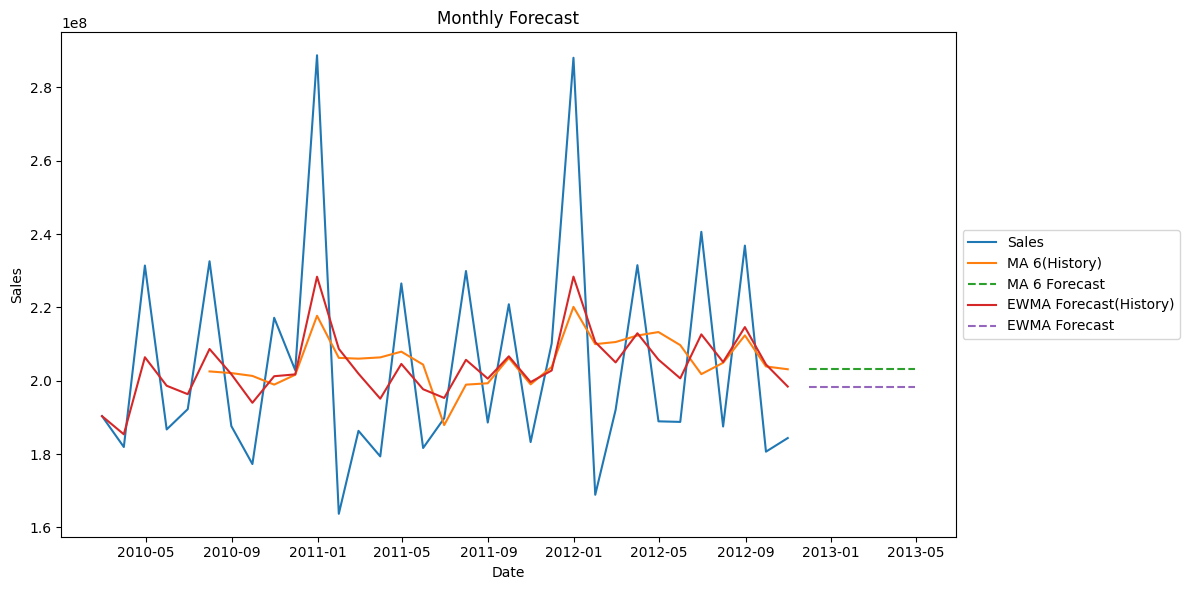

In [7]:
#simple forecast
import pandas as pd
monthly_data = monthly_data.rename(columns={"Month": "Date"})
df["Date"] = pd.to_datetime(df["Date"])
monthly_data = df.groupby(pd.Grouper(key="Date", freq="ME")).sum(numeric_only=True).reset_index()
monthly_data["Month"] = pd.to_datetime(monthly_data["Month"])
monthly_data["MA_6"] = monthly_data[sales].rolling(6).mean()
monthly_data["EWMA"] = monthly_data[sales].ewm(alpha=0.3).mean()
def forecast(last,months=6):
    last_date = monthly_data["Date"].max()
    dates = pd.date_range(last_date + pd.offsets.MonthEnd(1), periods=months, freq="ME")
    return pd.DataFrame({"Date": dates, "Forecast": [last] * months})
last_ma6 = monthly_data[sales].rolling(6).mean().iloc[-1]
fc_m6 = forecast(last_ma6)
last_ewm = monthly_data[sales].ewm(alpha=0.3).mean().iloc[-1]
fc_ewm = forecast(last_ewm)

plt.figure(figsize=(12, 6))
plt.plot(monthly_data["Date"],monthly_data[sales],label="Sales")
plt.plot(monthly_data["Date"],monthly_data["MA_6"],label="MA 6(History)")
plt.plot(fc_m6["Date"],fc_m6["Forecast"],"--",label="MA 6 Forecast")
plt.plot(monthly_data["Date"],monthly_data["EWMA"],label="EWMA Forecast(History)")
plt.plot(fc_ewm["Date"],fc_ewm["Forecast"],"--",label="EWMA Forecast")
plt.title("Monthly Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

